In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
ch_m=pd.read_csv('/content/drive/MyDrive/Christ/Datasets/Churn_Modelling.csv')

In [24]:
ch_m.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
ch_m.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [26]:
ch_m.drop(columns='Surname',axis=1)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
ch_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
ch_m.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
ch_m.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
ch_m.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
ch_m.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [32]:
ch_m.duplicated().sum()

0

In [33]:
ch_m=ch_m.drop(columns='Surname',axis=1)

<Axes: >

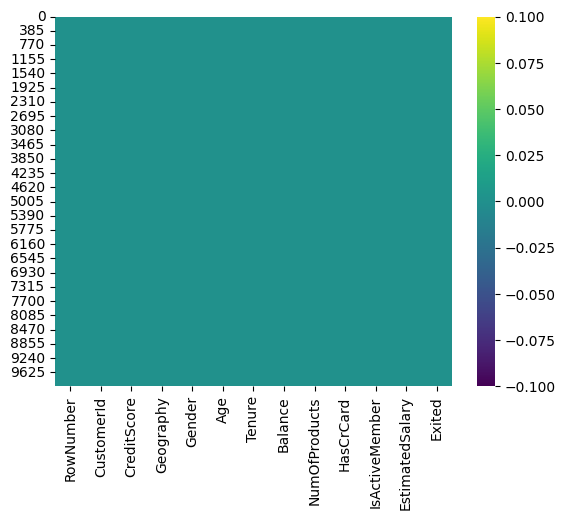

In [34]:
sns.heatmap(ch_m.isnull(),cmap='viridis')

In [35]:
ch_m = pd.get_dummies(ch_m, columns = ['Geography','Gender'])

<Axes: >

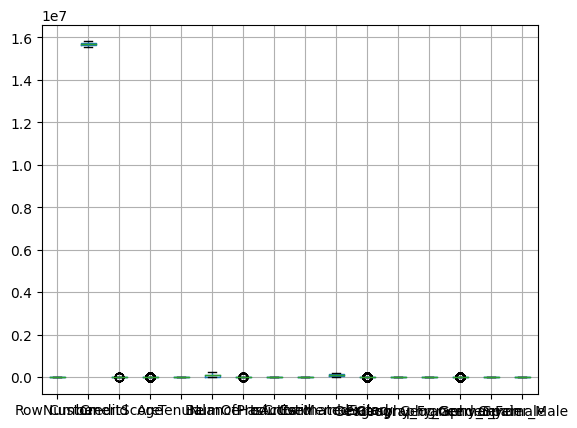

In [36]:
ch_m.boxplot()

<Axes: >

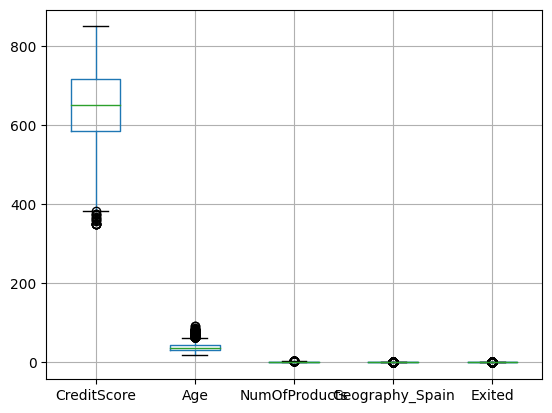

In [37]:
ch_m.boxplot(column=['CreditScore','Age','NumOfProducts','Geography_Spain','Exited'])

<Axes: >

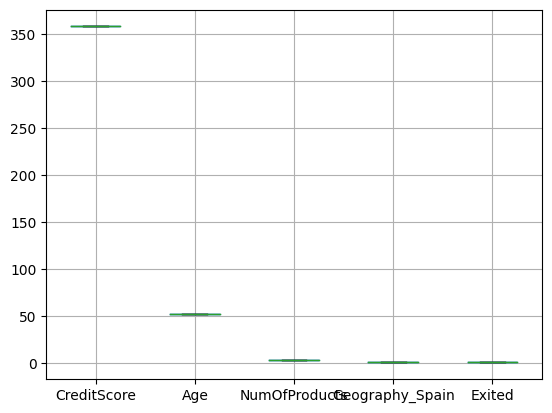

In [38]:
new_ch_m = ch_m[(ch_m['CreditScore'] < 400) & (ch_m['Age'] > 40)&(ch_m['NumOfProducts']>2.5)]
new_ch_m.boxplot(column=['CreditScore','Age','NumOfProducts','Geography_Spain','Exited'])

<Axes: >

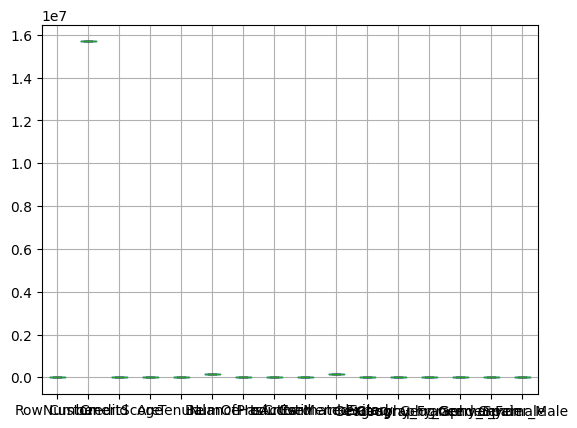

In [39]:
new_ch_m.boxplot()

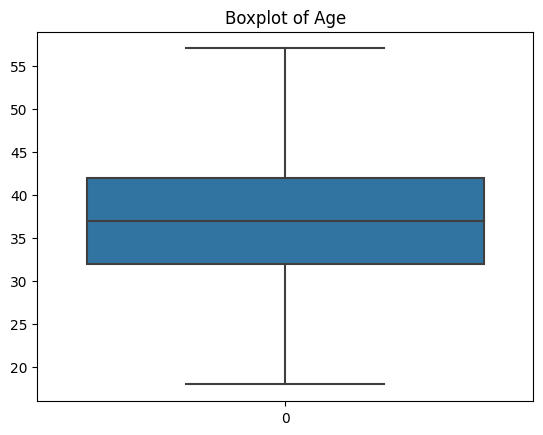

In [40]:
for i in ch_m['Age']:
    q1=ch_m['Age'].quantile(0.25)
    q3=ch_m['Age'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
        ch_m['Age']= ch_m['Age'].replace(i,np.median(ch_m['Age']))
sns.boxplot(ch_m['Age'])
plt.title("Boxplot of Age")
plt.show()

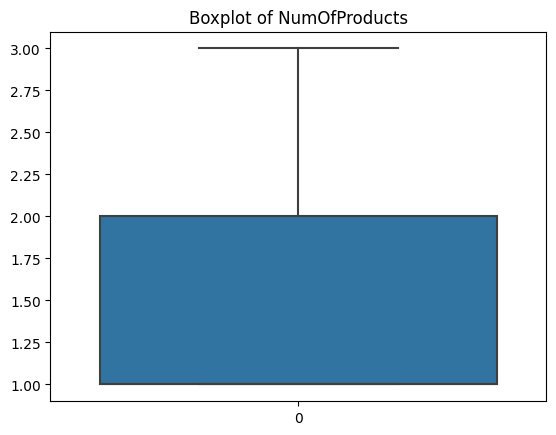

In [41]:
for i in ch_m['NumOfProducts']:
    q1=ch_m['NumOfProducts'].quantile(0.25)
    q3=ch_m['NumOfProducts'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          ch_m['NumOfProducts']= ch_m['NumOfProducts'].replace(i,np.median(ch_m['NumOfProducts']))
sns.boxplot(ch_m['NumOfProducts'])
plt.title("Boxplot of NumOfProducts")
plt.show()

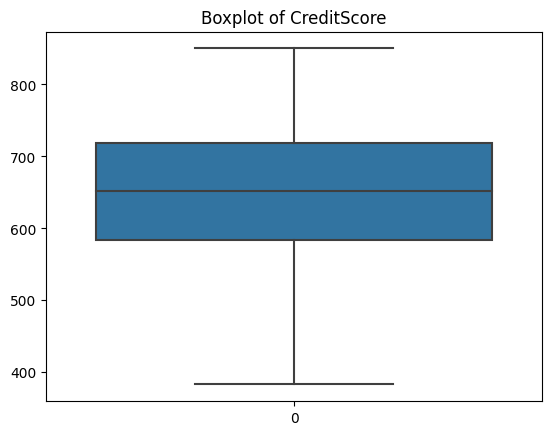

In [42]:
for i in ch_m['CreditScore']:
    q1=ch_m['CreditScore'].quantile(0.25)
    q3=ch_m['CreditScore'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          ch_m['CreditScore']= ch_m['CreditScore'].replace(i,np.median(ch_m['CreditScore']))
sns.boxplot(ch_m['CreditScore'])
plt.title("Boxplot of CreditScore")
plt.show()

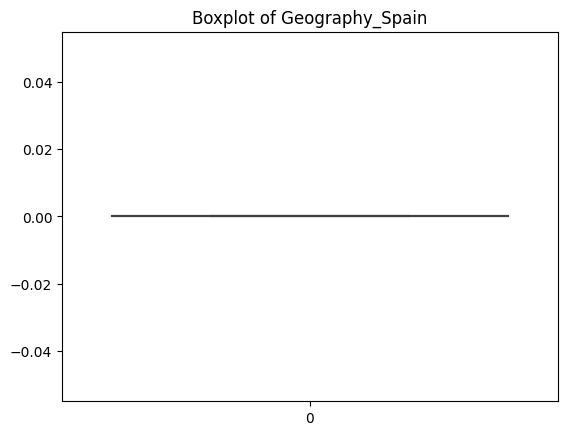

In [43]:
for i in ch_m['Geography_Spain']:
    q1=ch_m['Geography_Spain'].quantile(0.25)
    q3=ch_m['Geography_Spain'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          ch_m['Geography_Spain']= ch_m['Geography_Spain'].replace(i,np.median(ch_m['Geography_Spain']))
sns.boxplot(ch_m['Geography_Spain'])
plt.title("Boxplot of Geography_Spain")
plt.show()

<Axes: >

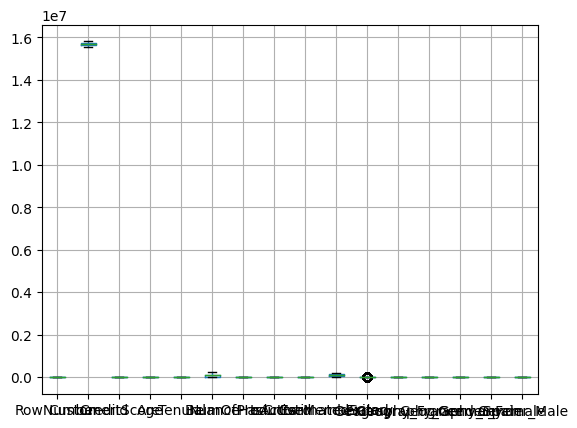

In [44]:
ch_m.boxplot()

In [45]:
ch_m.head(15)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,0
5,6,15574012,645,44,8,113755.78,2,1,0,149756.71,1,0,0,0,0,1
6,7,15592531,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,8,15656148,652,29,4,115046.74,1,1,0,119346.88,1,0,1,0,1,0
8,9,15792365,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,10,15592389,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [46]:
ch_m=ch_m.drop(columns='RowNumber',axis=1)

In [47]:
ch_m=ch_m.drop(columns='CustomerId',axis=1)

In [48]:
ch_m.head(15)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,652,29,4,115046.74,1,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


<ipython-input-49-8a8b01684f3d>:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


<Figure size 1600x800 with 0 Axes>

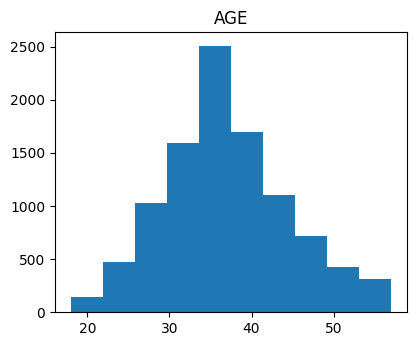

<Figure size 1600x800 with 0 Axes>

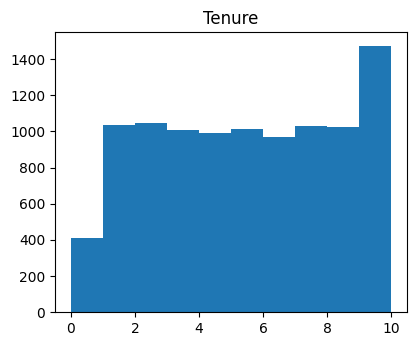

<Figure size 1600x800 with 0 Axes>

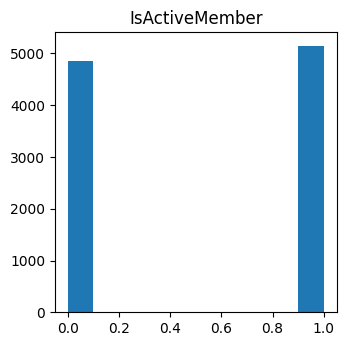

<Figure size 1600x800 with 0 Axes>

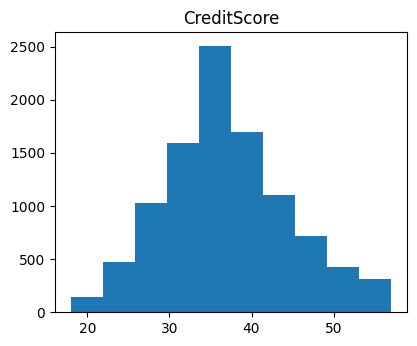

<Figure size 1600x800 with 0 Axes>

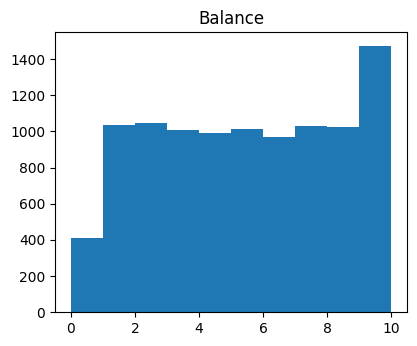

<Figure size 1600x800 with 0 Axes>

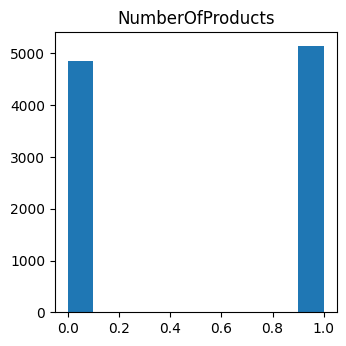

<Figure size 1600x800 with 0 Axes>

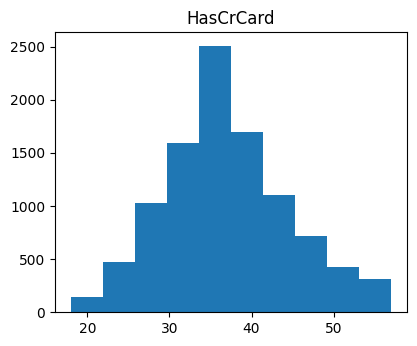

<Figure size 1600x800 with 0 Axes>

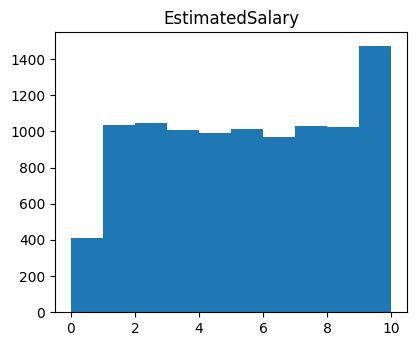

<Figure size 1600x800 with 0 Axes>

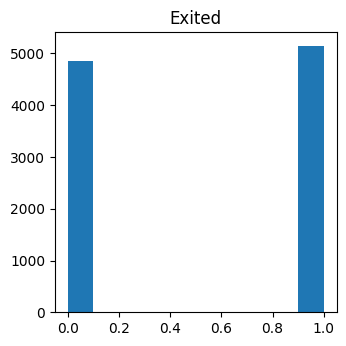

<Figure size 1600x800 with 0 Axes>

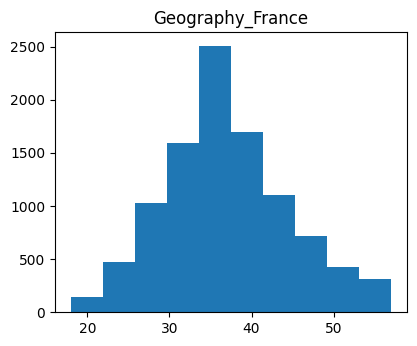

<Figure size 1600x800 with 0 Axes>

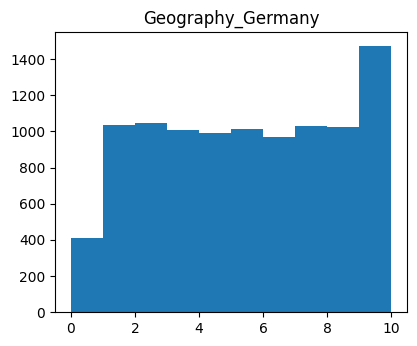

<Figure size 1600x800 with 0 Axes>

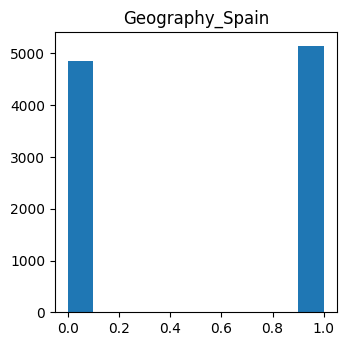

<Figure size 1600x800 with 0 Axes>

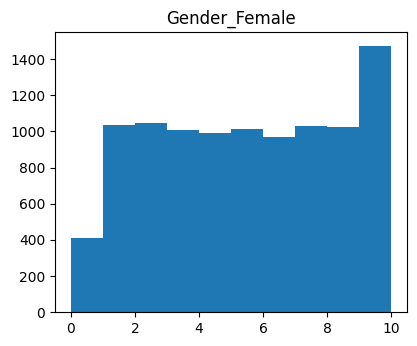

<Figure size 1600x800 with 0 Axes>

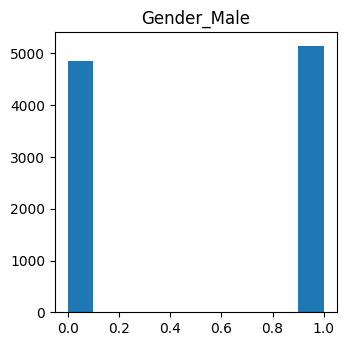

<Figure size 1600x800 with 0 Axes>

In [49]:
#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Age)
plt.title("AGE")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Tenure)
plt.title("Tenure")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.IsActiveMember)
plt.title("IsActiveMember")
plt.figure(figsize=(16, 8))
#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Age)
plt.title("CreditScore")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Tenure)
plt.title("Balance")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.IsActiveMember)
plt.title("NumberOfProducts")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Age)
plt.title("HasCrCard")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Tenure)
plt.title("EstimatedSalary")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.IsActiveMember)
plt.title("Exited")
plt.figure(figsize=(16, 8))
#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Age)
plt.title("Geography_France")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Tenure)
plt.title("Geography_Germany")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.IsActiveMember)
plt.title("Geography_Spain")
plt.figure(figsize=(16, 8))
#univariate
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.Tenure)
plt.title("Gender_Female")
plt.figure(figsize=(16, 8))

#univariate
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.hist(ch_m.IsActiveMember)
plt.title("Gender_Male")
plt.figure(figsize=(16, 8))

<Axes: >

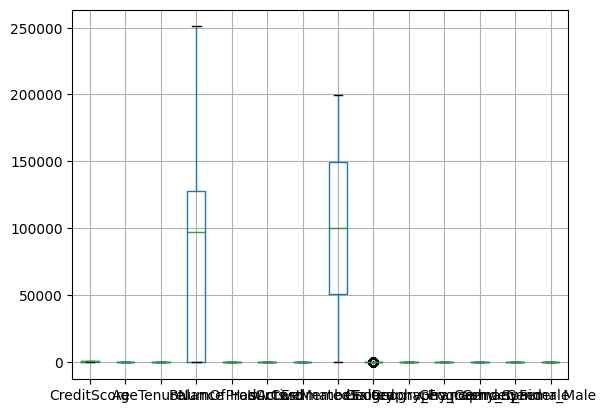

In [50]:
ch_m.boxplot()

<Axes: xlabel='Age', ylabel='NumOfProducts'>

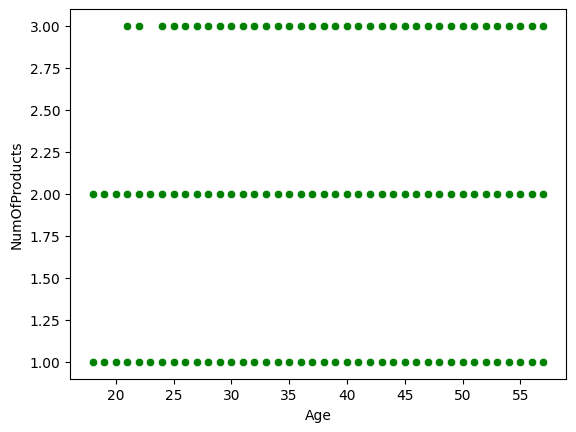

In [51]:
sns.scatterplot(x=ch_m.Age,y=ch_m.NumOfProducts,color="green")

In [52]:
X = ch_m.iloc[:, [0] + list(range(2, ch_m.shape[1] - 1))].values
y = ch_m.iloc[:,-1 ].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[272 621]
 [215 892]]


0.582